# results

In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_speech'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_pred.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("appro_ks.npy", allow_pickle=True).squeeze())
old_prediction = np.load("old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1071,)

In [3]:
np.nanmean(app_k)

807.8779803646564

In [4]:
pred = old_prediction

In [5]:
nan = new_pred_k[0]

In [6]:
new_pred_k_nonon = [new_pred_k[i] for i in range(app_k.shape[0]) if new_pred_k[i] > 0]
len(new_pred_k_nonon)

713

# can find smallest k

In [7]:
app_k_nonon = [app_k[i] for i in range(app_k.shape[0]) if app_k[i] > 0]
len(new_pred_k_nonon)

713

In [8]:
np.mean(app_k_nonon)

807.8779803646564

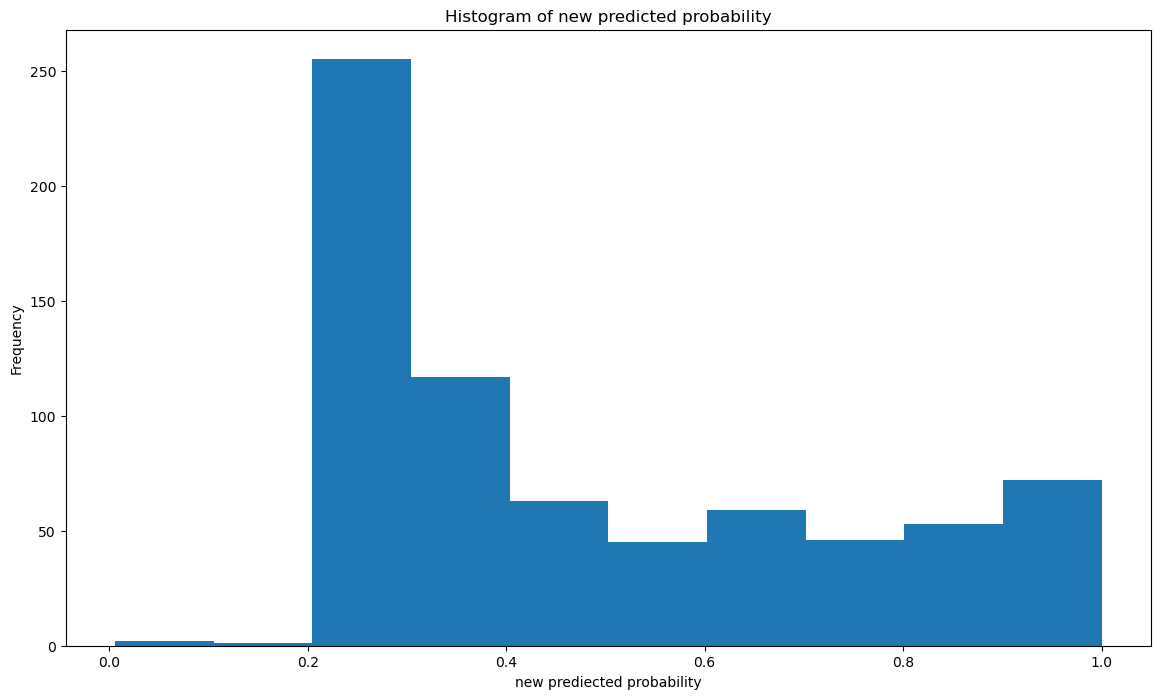

In [9]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [10]:
app_k_nonon = [app_k[i] for i in range(1298) if app_k[i] > 0]
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

IndexError: index 1071 is out of bounds for axis 0 with size 1071

In [11]:
flips = np.zeros((app_k.shape[0], 1))
diff = np.zeros((app_k.shape[0], 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(app_k.shape[0]):
    print("i", i)
    if app_k[i] > 0:
        if (pred[i].item()>0.25) != (new_pred_k[i].item()>0.25):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.05260322991399785
new 0.9510751775888061
appro k 2191.0
flip label [1.]

i 1
old 0.44794800858696293
new 0.25208718962600773
appro k 24.0
flip label [0.]

i 2
i 3
i 4
old 0.4554837611640793
new 0.24790828806902085
appro k 72.0
flip label [1.]

i 5
old 0.20574631931978812
new 0.2678307458128033
appro k 19.0
flip label [1.]

i 6
old 0.2627314255483339
new 0.2478696576028821
appro k 3.0
flip label [1.]

i 7
old 0.10732156290164183
new 0.4860939109602444
appro k 518.0
flip label [1.]

i 8
old 0.15800260115359135
new 0.31775767769186275
appro k 237.0
flip label [1.]

i 9
i 10
old 0.09728551824548086
new 0.5709582667190123
appro k 904.0
flip label [1.]

i 11
old 0.09565065016464189
new 0.6750157915133264
appro k 907.0
flip label [1.]

i 12
old 0.17704108383097436
new 0.27509530163020834
appro k 118.0
flip label [1.]

i 13
old 0.14141456801133998
new 0.33418149783030665
appro k 269.0
flip label [1.]

i 14
old 0.08121635489608196
new 0.5562393136642532
appro k 665.0
flip label [1.]



In [12]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(app_k.shape[0])])
num_flip

693

In [107]:
app_k.shape

(1298,)

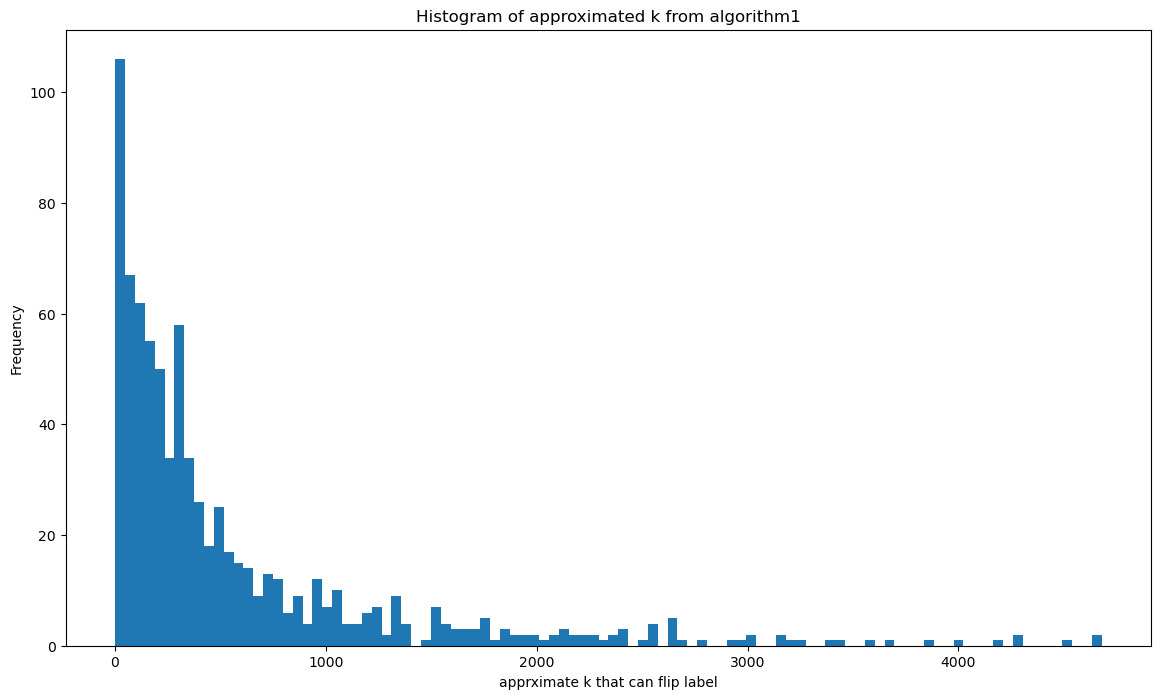

In [12]:

flip_idx = np.array([i for i in range(app_k.shape[0]) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

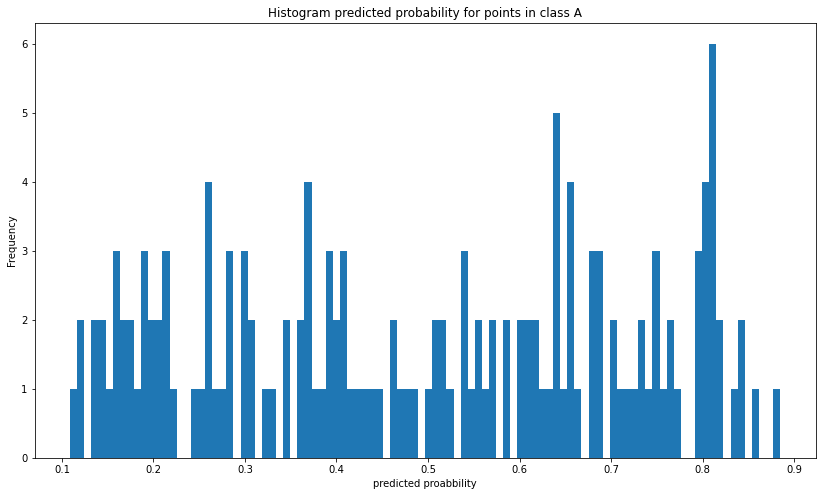

In [112]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [13]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(app_k.shape[0])])
num_noflip

131

In [14]:
# diff for those flip the lable
diff1=[diff[i] for i in range(app_k.shape[0]) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.28396391615226313, 0.026915085942879075)